## Chapter 3. Word2Vec

앞 장에 이어 이번 장의 주제도 단어의 분산 표현이다. 앞 장에서는 '통계 기반 기법'으로 단어의 분산 표현을 얻었지만, 이번 장에서는 더 강력한 '추론 기반 기법'에 대해 알아보겠다. 

'추론 기반 기법'은 추론을 하는 기법이다. 이 추론 과정에서 신경망을 이용한다. 그 중 유명한 word2vec에 대해 알아보겠다. 

이번 장의 목표는 '단순한' word2vec 구현하기이다. 처리 효율을 희생하는 대신 이해하기 쉽도록 아주 단순한 word2vec의 구조에 대해 알아보겠다. 따라서 큰 데이터셋 대신, 작은 데이터셋으로 먼저 처리할 수 있도록 구성할 것이다. 다음 장에서 이번 장에서 만든 단순한 word2vec을 개선하여 '진짜' word2vec을 완성시킬 예정이다. 



# 3.1. 추론 기반 기법과 신경망

## 3.1.1. 통계 기반 기법의 문제점

통계 기반 기법에서 흔히 하듯, 단어를 표현할때 주변 단어의 빈도를 기초로 했다. 단어의 동시발생 행렬을 만들고 그 행렬에 SVD를 적용하여 밀집 벡터 (단어의 분산 표현)을 얻어냈지만, 대규모 말뭉치를 다룰 때 문제가 발생한다. 

현업에서 다루는 말뭉치의 어휘 수는 어마어마하다. 예컨데 영어의 어휘 수는 100만개를 훌쩍 넘는다. 어휘가 100개라면, 통계 기반 기법에서는 '100만 * 100만'이라는 거대한 행렬을 만들어야 한다. 이러한 거대한 행렬에 SVD를 적용하는 일은 현실적이지 않다. 

또한, 통계 기반 기법은 말뭉치 전체의 통계 (동시발생 행렬과 PPMI등)를 이용해 단 1회의 처리 (SVD 등)에 단어의 분산 표현을 얻는다. 한편, 추론 기반 기법에서는, 예컨데 신경망을 이용하는 경우는 미니배치로 학습하는 것이 일반적이다. 

미니배치 학습에서는 신경망이 한번에 소량 (미니배치)의 학습 샘플씩 반복해서 학습하며 가중치를 생신해간다 

[그림 3-1]두 기법의 큰 차이 (통계 기반 기법과 추론 기반 기법 비교)

<img src = "./images_equations/fig3-1.png" width=400>

## 3.1.2. 추론 기반 기법 개요

추론 기반 기법의 주된 작업은 '추론'이다. 
추론이란 아래 그림3-2처럼 주변 단어(맥락)가 주어졌을 때 '?'에 무슨 단어가 들어가는지를 추측하는 작업이다. 

<img src = "./images_equations/fig 3-2.png" width=400>

위 그림처럼 **추론 문제를 풀고 학습하는 것이 '추론 기반 기법'**이다. 이러한 추론 문제를 반복해서 풀면서 단어의 출현 패턴을 학습한다. '모델 관점'에서 보면, 이 추론 문제는 [그림3-3]처럼 보인다. 

<img src = "./images_equations/fig 3-3.png" width=400>

위 그림3-3처럼 추론 기반 기법에는 어떠한 모델이 등장한다. 우리는 이 모델로 신경망을 사용한다. 
여기서 모델은 '맥락'정보를 입력바다 (출현 가능한) 각 단어의 출현 **확률**을 출력한다. 
이러한 틀 안에서 말뭉치를 사용해 모델이 올바른 추측을 내놓도록 학습시킨다. 
그리고 그 학습의 결과로 단어의 분산 표현을 얻는 것이 추론 기반 기법의 전체 그림이라고 할 수 있다. 

(추론 기반 기법도 통계 기반 기법처럼 분포 가설에 기초한다. 
분포 가설이란, 단어의 의미는 주변 단어에 의해 형성된다-는 가설로, 추론 기반 기법에서는 이를 앞에서와 같은 
추측 문제로 귀결시킨다. 이처럼 두 기법 모두 분포 가설에 근거하는 '단어의 동시발생 가능성'을 얼마나 잘 모델링하는가가 중요한 연구주제이다)

## 3.1.3. 신경망에서의 단어 처리

지금부터 신경망을 이용해 '단어'를 처리해보자. 
신경망은 'you', 'say' 등의 **글자 그대로의** 단어를 처리할 수 없다 (즉 계산할 수 없다). 
따라서 단어를 '고정 길이의 벡터'로 변환해야한다. 
이때 사용하는 대표적인 방법이 '원핫 표현 (또는 원핫 벡터)'로 변환하는 것이다. 
원핫 표현이란 벡터의 원소 중 하나만 1이고 나머지는 모두 0인 벡터를 말한다. 

원핫 표현에 대해 구체적으로 살펴보자.

<img src = "./images_equations/fig 3-4.png" width=400>


<img src = "./images_equations/fig 3-5.png" width=400>


<img src = "./images_equations/fig 3-6.png" width=400>



<img src = "./images_equations/fig 3-7.png" width=400>

 지금까지의 완전연결계층에 의한 변환은 파이썬으로 다음과 같다:

아래 코드는 ID가 0인 단어를 원한 표현으로 표현한 다음, 완전연결계층을 통과시켜 변환한다. 
완전연결계층(FCN)의 계산은 행렬 곱으로 수행할 수 있고, 행렬 곱은 넘파이의 np.matmul()이 해결해준다 (편향은 생략한다)

In [5]:
import numpy as np
c = np.array([1,0,0,0,0,0,0]) #입력
W = np.random.randn(7,3) #가중치
h = np.matmul(c,W) #중간 노드

print(h)


[-0.59169804  1.13436143  0.79875587]


앞의 코드에서 주목할 곳은 c와 W의 행렬 곱 부분이다. 
c 는 원핫 표현이므로 단어ID에 대응하는 원소만 1이고 그 외에는 0인 벡터다. 따라서 앞 코드의 c와 W의 행렬 곱은 결국 [그림3-8]처럼 가중치의 행벡터 하나를 "뽑아낸" 것과 같다. 

<img src = "./images_equations/fig 3-8.png" width=400>

그저 가중치로부터 행벡터를 뽑아낼 뿐인데 행렬 곱을 계산하는 건 비효율적이라고 생각될 수 있다. 
이 점은 '4.1word2vec 개선(1)' 절에서 개선할 예정이다. 
또한, 앞의 코드로 수행한 작업은 (1장에서 구현한) MatMul 계층으로도 수행할 수 있다. (아래 코드 참고)

In [9]:
%pwd

'/Users/yklee/study/deep-learning-from-scratch-2'

In [13]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx


In [14]:
import sys
sys.path.append('..')
import numpy as np
from common import layers 

c = np.array([1,0,0,0,0,0,0]) #입력
W = np.random.randn(7,3)
layer = MatMul(W)
h=layer.forward(c)
print(h)

[-0.34702562 -1.90623624  0.24143819]


# 3.2. 단순한 word2vec

앞 절에서는 추론 기반 기법을 배우고, 신경망으로 단어를 처리하는 방법을 코드로 살펴봄.
이제 word2vec(아주 간단한 것)을 구현해보자

지금부터 할 일은 [그림3-3]의 '모델'을 신경망으로 구축하는 것이다. 
이번 절에서 사용할 신경망은 word2vec에서 제안하는 CBOW(continuous bag-of-words)모델이다. 

## 3.2.1. CBOW 모델의 추론 처리

- CBOW 모델은 맥락으로부터 타깃(target)을 추측하는 용도의 신경망이다. ('타깃'은 중앙 단어이고 그 주변 단어들이 '맥락'이다) 
- 우리는 이 CBOW 모델이 가능한 한 정확하게 추론하도록 훈련시켜서 단어의 분산 표현을 얻어낼 것이다.

- CBOW 모델의 입력은 '맥락'이다. 맥락은 'you', 'goodbye'같은 단어들의 **목록**이다. 
가장 먼저, 이 맥락을 원핫 표현으로 변환하여 CBOW모델이 처리할 수 있도록 준비한다. 
이상을 기초로 CBOW모델의 신경망을 아래 [그림3-9]처럼 그릴 수 있다. 

<img src = "./images_equations/fig 3-9.png" width=400>


- 위 [그림3-9]가 CBOW모델의 신경밍이다. 
- 입력층이 2개이고 은닉층을 거쳐 출력층에 도달한다. 
- 두 입력층에서 은닉층으로의 변환은 똑같은 완전연결계층(가중치는 W_in)이 처리한다. 
- 그리고 은닉층에서 출력층 뉴런으로의 변환은 다른 완전연결계층(가중치는 W_out)이 처리한다. 

<은닉층>

- [그림3-9]의 은닉층에 주목하자. 은닉층의 뉴런은 입력층의 완전연결계층에 의해 변환된 값이 되는데, 입력층이 여러 개이면 전체를 '평균'하면 된다. 앞의 예에 대입해보면 다음과 같다. 
- 완전연결계층에 의한 첫 번째 입력층이 h_1으로 변환되고, 두번째 입력층이 h_2로 변환되었다고 하면, 은닉층 뉴런은 1/2(h_1+h_2)가 된다. 

<출력층>

- 총 7개의 뉴런 (여기서 중요한 점은 이 뉴런 하나하나가 각각의 단어에 대응한다는 점이다) 
- 출력층 뉴런은 각 단어의 '점수'를 뜻한다. 값이 높을수록 대응 단어의 출현 확률도 높아진다. 
- 여기에 나오는 '점수'는 확률로 해석되기 **전**의 값이다. 이 점수에 **소프트맥스**(softmax)함수를 적용해서 '확률'을 얻을 수 있다


<img src = "./images_equations/fig 3-10.png" width=400>

- 가중치의 각 행이 해당 단어의 분산 표현이다.



- [그림 3-10]에 나오는 가중치(W_in)의 각 행에는 해당 단어의 분산 표현이 담겨있다. 
- 학습을 진행할수록 맥락에서 (단어 목록) 출현하는 단어를 잘 추측할 수 있도록 이 분산 표현이 갱신될 것이다 (업데이트)
- 은닉층의 뉴런수를 입력층의 뉴런 수보다 적게 하는 것이 중요하다. 이렇게 해야 은닉층에는 단어 예측에 필요한 인코딩 정보를 '간결하게' 담게 되며, 결과적으로 밀집벡터 표현을 얻을 수 있다. 인풋->은닉층 = 인코딩. 은닉층 => 결과: 디코딩. 즉, 디코딩이란 인코딩된 정보를 우리 인간이 이해할 수 있는 표현으로 복원하는 작업이다.
- 이렇게해서 얻은 벡터에는 '단어의 의미'도 잘 녹아들어있다. 이것이 word2vec의 전체 그림이다.

<img src = "./images_equations/fig 3-11.png" width=400>

- 계층 관점에서 본 CBOW모델의 신경망 구성: MatMul 계층에서 사용하는 가중치(W_in, W_out)는 해당 계층 안으로 넣었다. 

지금까지 우리는 CBOW모델을 '뉴런 관점'에서 그렸다. 이번에는 '계층 관점'에서 그려보자. 

위 그림 3-11은 그림 3-9의 신경망을 계층 관점에서 그린 모습이다. 

그림에서 알 수 있듯이 CBOW 모델의 가장 앞 단에는 2개의 MatMul 계층이 있고, 이어서 이 두 계층의 출력이 더해진다. 그리고 더해진 값에 0.5를 곱하면 '평균'이 된다. 이 평균이 은닉층의 뉴런이 된다. 

마지막으로 은닉층 뉴런에 또 다른 MatMul계층이 적용되어 '점수score'가 출력된다. 
(편향을 사용하지 않는 완전연결계층의 처리는 MatMul layer의 순전파와 같다. 이 계층은 내부에서 행렬 곱을 계산한다)


그림 3-11을 참고하여 cbow모델의 추론 처리를 파이썬으로 구현해보자. 

_추론 처리_란, '점수'를 구하는 처리를 말한다. 

In [15]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul


# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화 
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성 (입렻긍을 처리하는 matmul계층을 맥락 수만큼 (2개) 생성하고, 출력층 측의 matmul은 1개만 생성) 여기서 matmul계층은 가중치 w_in을 공유한다는 점에 주의하자.
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s) 

[[0.15404488 0.69272704 0.36943414 0.10675218 0.5155834  1.32430336
  0.71115208]]


## 3.2.2. CBOW모델의 학습

지금까지 설명한 CBOW 모델은 출력층에서 각 단어의 점수를 출력함. 이 점수에 소프트맥수 함수를 적용하면 '확률'을 얻을 수 있음. (그림 3-12)
이 확률은 맥락 (전후 단어)이 주어졌었을 때 그 중앙에 어떤 단어가 출현하는지를 나타낸다. 

[그림3-12]의 예에서 맥락은 'you'와 'goodbye'이고, 정답 레이블(신경망이 예측해야할 단어)은 'say'이다. 
이때 '가중치가 적절히 설정된' 신경망이라면 '확률'을 나타내는 뉴런들 중 정답에 해당하는 뉴런의 값이 클 것이라 기대할 수 있다. 


모델 학습에서는 올바른 예측을 할 수 있도록 가중치를 조정하는 일을 한다. 그 결과로 가중치 W_in에 (정확히는 W_in과 W_out모두에) 단어의 출현 패턴을 파악한 벡터가 학습된다

<img src = "./images_equations/fig 3-12.png" width=400>

CBOW모델의 구체적인 예 (노드 값의 크기를 흑백의 진하기로 나타냄)

<img src = "./images_equations/fig 3-13.png" width=400>

CBOW모델의 학습 시 신경망 구성

<img src = "./images_equations/fig 3-14.png" width=400>

Softmax계층과 Cross Entropy Error 계층을 Softmax with Loss 계층으로 합침 

### 3.2.3. word2vec의 가중치와 분산 표현

- word2vec에 사용되는 신경망에는 두 가지 종류가 있다. 
- 입력측, 출력측, 양쪽 가중치 중 어떤 것을 사용하느냐에 따라 다르다
- word2vec(특히 skip-gram)에서는 '입력 측의 가중치만 이용한다'가 가장 대중적인 선택이다. 많은 연구에서 출력 측 가중치는 버리고 입력 측 가중치 W_in만을 최종 단어의 분산 표현으로서 이용한다. 우리도 이를 따라서  W_in을 단어의 분산 표현으로 이용할 것이다. 

# 3.3. 학습 데이터 준비

"You say goodbye and I say hello"라는 한 문장짜리 코퍼스를 예시로 써보자.

## 3.3.1. 맥락과 타깃

<img src = "./images_equations/fig 3-16.png" width=400>



In [18]:
#말뭉치로부터 목표로 하는 단어를 '타깃'으로, 그 주변 단어를 '맥락'으로 뽑아내자.
import sys
sys.path.append('..')
from common.util import preprocess

text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello'}



<img src = "./images_equations/fig 3-17.png" width=400>

- 단어의 ID 의 배열인 corpus로부터 맥락과 타깃을 작성하는 예 (맥락의 윈도우 크기는 1)
- 맥락은 2차원 배열이다. 이때 맥락의 0번째 차원에는 각 맥락 데이터가 저장된다. 정확히 말하면 contexts[0]에는 0번째 맥락이 저장되고, contexts[1]에는 1번째 맥락이 저장되는 식이다. 마찬가지로 타깃에서도 target[0]에는 0번째 타깃이, target[1]에는 1번째 타깃이 저장된다. 

- 다음은 이 맥락과 타깃을 만드는 함수를 구현할 차례이다. 
create_contexts_target(corpus,window_size)라는 이름으로 다음과 같이 구현하자 (common/util.py)



In [19]:
def create_contexts_target(corpus, window_size=1):
    '''맥락과 타깃 생성
    :param corpus: 말뭉치(단어 ID 목록)
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return:
    '''
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)

- 이 함수는 인수를 두 개 받는다. 
- 하나는 단어ID의 배열(corpus), 다른 하나는 맥락의 윈도우 크기 (window_size)
- 그리고 맥락과 타겟을 각각 넘파이 다차원 배열로 돌려준다. 이 함수를 실제로 사용해보겠다. 


In [20]:
contexts, target = create_contexts_target(corpus, window_size=1)
print(contexts)

print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]]
[1 2 3 4 1]


이렇게 말뭉치(corpus)로부터 맥락과 타겟을 만들어보았다. 
나중에 이를 CBOW모델에 넘겨주면 된다. 그러나 아직 이 맥락과 타겟의 각 원소가 여전히 단어ID이다. 그럼 이어서 이를 원핫 표현으로 변환해보겠다

## 3.3.2. 원핫 표현으로 변환
계속해서 맥락과 타겟을 원핫 표현으로 바꿔보자. 이때 수행하는 변환은 [그림3-18]과 같다. 
<img src = "./images_equations/fig 3-18.png" width=400>


[그림3-18]의 예처럼 맥락과 타겟을 단어ID에서 원핫 표현으로 변환하면 된다. 이때 다시 한번 각각의 다차원 배열의 형상에 주목하자. 잘 보면, 이 그림에서는 단어ID를 이용했을 때의 맥락의 형상은 (6,2)인데, 이를 원핫표현으로 변환하면 (6,2,7)이 된다. 



In [22]:
def convert_one_hot(corpus, vocab_size):
    '''원핫 표현으로 변환
    :param corpus: 단어 ID 목록(1차원 또는 2차원 넘파이 배열)
    :param vocab_size: 어휘 수
    :return: 원핫 표현(2차원 또는 3차원 넘파이 배열)
    '''
    N = corpus.shape[0]

    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1

    return one_hot


In [23]:
import sys 
sys.path.append("..")
from common.util import preprocess, create_contexts_target, convert_one_hot
text = "You say goodbye and I say hello"
corpus, word_to_id, id_to_word = preprocess(text)

contexts, target = create_contexts_target(corpus, window_size=1)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [29]:
vocab_size

6

In [27]:
print(target)

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 0 0]]


In [28]:
print(contexts)

[[[1 0 0 0 0 0]
  [0 0 1 0 0 0]]

 [[0 1 0 0 0 0]
  [0 0 0 1 0 0]]

 [[0 0 1 0 0 0]
  [0 0 0 0 1 0]]

 [[0 0 0 1 0 0]
  [0 1 0 0 0 0]]

 [[0 0 0 0 1 0]
  [0 0 0 0 0 1]]]


# 3.4. CBOW 모델 구현

[3-19] CBOW모델의 신경망 구현
[그림3-19]의 신경망을 SimpleCBOW라는 이름으로 구현할 것이다. SimpleCBOW클래스의 초기화 메서드부터 시작해보자
(ch03/simple_cbow.py)


<img src = "./images_equations/fig 3-19.png" width=400>



In [35]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화, 이때 넘파이 배열의 데이터 타입은astype('f)32비트 부동소수점
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

이것으로 역전파 구현까지 모두 마침. 우리는 이미 각 매개변수의 기울기를 인스턴스 변수 grads에 모아두었다. 
따라서 foward()매서드를 호출한 다음 backward() 매서드를 실행하는 것만으로 grads리스트의 기울기가 갱신된다. 

다음은 SimpleCBOW클래스의 학습을 살펴보자

## 3.4.1. 학습 코드 구현

CBOW 모델의 학습은 일반적인 신경망의 학습과 완전히 같다. 
학습 데이터를 준비해 신경망에 입력한 다음, 기울기를 구하고 가중치 매개변수를 순서대로 갱신해갈 것이다. 

1장에서 설명한 Trainer 클래스를 다시 상기해보자. 이번 학습과정을 수행하는데 이 클래스를 이용해보자. 
아래가 학습을 위한 코드이다 (ch03/train.py)

 1[s] | 손실 0.63
| 에폭 582 |  반복 1 / 2 | 시간 1[s] | 손실 0.79
| 에폭 583 |  반복 1 / 2 | 시간 1[s] | 손실 0.59
| 에폭 584 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 585 |  반복 1 / 2 | 시간 1[s] | 손실 0.85
| 에폭 586 |  반복 1 / 2 | 시간 1[s] | 손실 0.34
| 에폭 587 |  반복 1 / 2 | 시간 1[s] | 손실 0.72
| 에폭 588 |  반복 1 / 2 | 시간 1[s] | 손실 0.62
| 에폭 589 |  반복 1 / 2 | 시간 1[s] | 손실 0.81
| 에폭 590 |  반복 1 / 2 | 시간 1[s] | 손실 0.46
| 에폭 591 |  반복 1 / 2 | 시간 1[s] | 손실 0.60
| 에폭 592 |  반복 1 / 2 | 시간 1[s] | 손실 0.62
| 에폭 593 |  반복 1 / 2 | 시간 1[s] | 손실 0.65
| 에폭 594 |  반복 1 / 2 | 시간 1[s] | 손실 0.66
| 에폭 595 |  반복 1 / 2 | 시간 1[s] | 손실 0.55
| 에폭 596 |  반복 1 / 2 | 시간 1[s] | 손실 0.75
| 에폭 597 |  반복 1 / 2 | 시간 1[s] | 손실 0.52
| 에폭 598 |  반복 1 / 2 | 시간 1[s] | 손실 0.72
| 에폭 599 |  반복 1 / 2 | 시간 1[s] | 손실 0.68
| 에폭 600 |  반복 1 / 2 | 시간 1[s] | 손실 0.56
| 에폭 601 |  반복 1 / 2 | 시간 1[s] | 손실 0.45
| 에폭 602 |  반복 1 / 2 | 시간 1[s] | 손실 0.62
| 에폭 603 |  반복 1 / 2 | 시간 1[s] | 손실 0.74
| 에폭 604 |  반복 1 / 2 | 시간 1[s] | 손실 0.53
| 에폭 605 |  반복 1 / 2 | 시간 1[s] | 손실 0.74


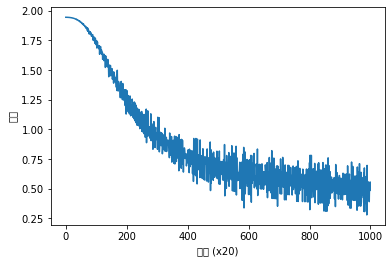

you [ 0.92959255  1.0589069   1.3455471  -1.456136    0.58067787]
say [-1.3041788  -0.6097657  -0.2928373  -0.02553379 -1.2852652 ]
goodbye [ 0.9180985   0.9737682   0.50748545 -0.30862084  1.2210654 ]
and [-1.092893  -1.34753    1.4959707 -1.415607  -1.0460085]
i [ 0.92532074  0.9860437   0.5039795  -0.29979742  1.2368453 ]
hello [ 0.9410774   1.0579448   1.339414   -1.4627044   0.56426626]
. [-1.1432261  1.577998  -1.2666957  1.2822665 -1.1385578]


In [39]:
# coding: utf-8
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
#from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

In [40]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 0.92959255  1.0589069   1.3455471  -1.456136    0.58067787]
say [-1.3041788  -0.6097657  -0.2928373  -0.02553379 -1.2852652 ]
goodbye [ 0.9180985   0.9737682   0.50748545 -0.30862084  1.2210654 ]
and [-1.092893  -1.34753    1.4959707 -1.415607  -1.0460085]
i [ 0.92532074  0.9860437   0.5039795  -0.29979742  1.2368453 ]
hello [ 0.9410774   1.0579448   1.339414   -1.4627044   0.56426626]
. [-1.1432261  1.577998  -1.2666957  1.2822665 -1.1385578]
